In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importind libraries


In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#Impoting dataset

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/movies.utf.csv',sep = '::')

<ipython-input-3-8ef384d34bfb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/movies.utf.csv',sep = '::')


In [4]:
df1.columns =['Movie Id', 'Title', 'Genre']

In [5]:
df1.head()

,Movie Id,Title,Genre
0,2,Jumanji (1995),"Adventure|Children's|Fantasy,,"
1,3,Grumpier Old Men (1995),"Comedy|Romance,,"
2,4,Waiting to Exhale (1995),"Comedy|Drama,,"
3,5,Father of the Bride Part II (1995),"Comedy,,"
4,6,Heat (1995),"Action|Crime|Thriller,,"


In [6]:
pd.isnull(df1).sum()

Movie Id    0
Title       0
Genre       0
dtype: int64

In [7]:
df1.duplicated().any()

False

In [8]:
df1 = df1.assign(Genre=df1['Genre'].str.split('|')).explode('Genre')

In [9]:
df1['Genre']=df1['Genre'].str.replace(',,','')

In [10]:
df1['Genre']=df1['Genre'].str.replace(",", "")

In [11]:
df1.head()

,Movie Id,Title,Genre
0,2,Jumanji (1995),Adventure
0,2,Jumanji (1995),Children's
0,2,Jumanji (1995),Fantasy
1,3,Grumpier Old Men (1995),Comedy
1,3,Grumpier Old Men (1995),Romance


In [12]:
df2 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/ratings.utf.csv',sep = '::')

<ipython-input-12-a3c535cc01df>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/ratings.utf.csv',sep = '::')


In [13]:
df2.columns =['User Id', 'Movie Id', 'Rating', 'Timestamp']

In [14]:
df2.head()

,User Id,Movie Id,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [15]:
df2.duplicated().any()

False

In [16]:
pd.isnull(df2).sum()

User Id      0
Movie Id     0
Rating       0
Timestamp    0
dtype: int64

In [17]:
df3 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/users.utf.csv',sep = '::')

<ipython-input-17-5baab154dcc5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df3 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/users.utf.csv',sep = '::')


In [18]:
df3.columns = ['User Id', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [19]:
df3.head()

,User Id,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [20]:
pd.isnull(df3).sum()

User Id       0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [21]:
df3.duplicated().any()

False

In [22]:
df_merge = pd.merge(df1, df2, on="Movie Id")

In [23]:
df_merge.head()

,Movie Id,Title,Genre,User Id,Rating,Timestamp
0,2,Jumanji (1995),Adventure,10,5,979168267
1,2,Jumanji (1995),Adventure,13,3,978202563
2,2,Jumanji (1995),Adventure,18,2,978152541
3,2,Jumanji (1995),Adventure,23,2,978461604
4,2,Jumanji (1995),Adventure,27,1,978129692


In [24]:
df_merge.drop(columns=['Movie Id'], inplace=True)

In [25]:
dataset = pd.merge(df_merge, df3, on="User Id")

In [26]:
dataset.head()

,Title,Genre,User Id,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,Jumanji (1995),Adventure,10,5,979168267,F,35,1,95370
1,Jumanji (1995),Children's,10,5,979168267,F,35,1,95370
2,Jumanji (1995),Fantasy,10,5,979168267,F,35,1,95370
3,Sabrina (1995),Comedy,10,4,978227763,F,35,1,95370
4,Sabrina (1995),Romance,10,4,978227763,F,35,1,95370


In [27]:
dataset.shape

(2095471, 9)

In [28]:
dataset.drop(columns=['Title','Gender','Occupation','Zip-code'],inplace=True)

In [29]:
dataset['Rating'].value_counts()

4    726501
3    549937
5    475437
2    227041
1    116555
Name: Rating, dtype: int64

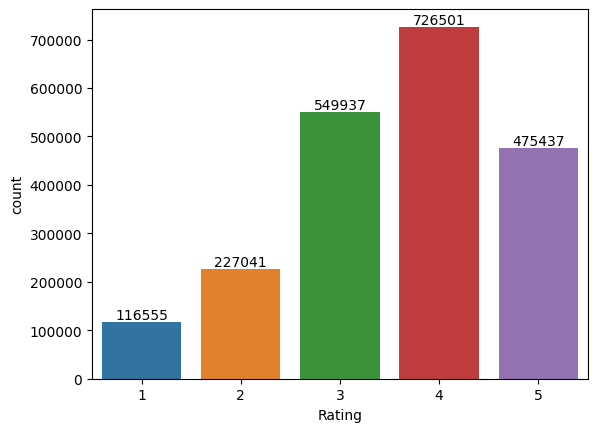

In [30]:
ax = sns.countplot(dataset, x='Rating')
for bars in  ax.containers:
   ax.bar_label(bars)

In [31]:
col_order=['Genre', 'User Id', 'Timestamp','Age', 'Rating']
dataset=dataset[col_order]

In [32]:
dataset.head(5)

,Genre,User Id,Timestamp,Age,Rating
0,Adventure,10,979168267,35,5
1,Children's,10,979168267,35,5
2,Fantasy,10,979168267,35,5
3,Comedy,10,978227763,35,4
4,Romance,10,978227763,35,4


In [33]:
s_dataset = dataset.sample(n=1000, random_state=42)

#Data preprocessing

In [34]:
X = s_dataset.iloc[:,:-1].values
Y = s_dataset.iloc[:,-1].values

In [35]:
print(X)

[['Drama' 1591 974743364 50]
 ['Comedy' 3836 965926487 50]
 ['Sci-Fi' 3032 970357938 25]
 ...
 ['Mystery' 1182 974862564 1]
 ['Comedy' 4265 965304018 25]
 ['Action' 5982 956935394 35]]


In [36]:
print(Y)

[5 4 4 4 3 3 1 2 4 3 4 3 4 5 4 3 3 4 4 3 4 5 5 5 4 3 5 5 4 3 3 4 4 2 3 4 2
 5 4 4 4 2 5 5 4 3 5 4 1 3 2 1 2 4 3 4 3 2 4 2 3 4 4 3 3 3 5 2 2 4 5 5 3 5
 3 5 5 2 4 5 4 4 3 5 3 3 2 5 3 3 2 4 4 5 3 5 2 4 5 2 4 1 2 4 5 5 3 4 5 1 3
 5 4 3 3 4 5 4 3 3 5 4 3 1 4 1 3 3 4 4 3 4 2 3 3 4 5 3 3 4 5 1 4 4 3 3 5 4
 2 4 4 4 3 2 5 4 5 5 5 4 5 3 4 2 3 5 5 4 2 4 4 4 5 3 5 4 1 4 3 1 4 4 2 2 4
 4 4 1 3 5 3 4 4 5 4 3 5 3 3 4 5 4 2 3 2 4 4 3 4 4 4 3 1 5 4 4 2 4 3 4 5 4
 5 3 2 5 3 4 4 5 5 2 5 1 3 2 5 3 5 5 5 4 4 5 2 4 4 5 3 4 4 3 2 3 5 3 5 4 5
 3 5 4 5 5 4 4 5 3 5 3 5 5 1 5 4 5 3 3 4 5 4 2 4 5 3 4 3 4 3 5 5 2 3 3 2 2
 5 4 3 4 5 4 4 1 3 4 4 3 4 5 4 2 4 5 5 3 3 4 3 3 5 2 5 4 5 4 4 3 4 1 4 1 4
 3 5 4 5 3 5 3 5 3 3 4 3 1 3 5 3 4 4 4 5 4 3 3 3 4 3 3 2 3 4 4 2 3 3 4 4 2
 3 4 3 3 2 3 5 4 4 5 3 5 3 3 5 2 5 4 4 4 4 3 5 3 3 5 4 4 1 4 5 5 4 4 3 4 2
 3 4 3 2 4 4 5 3 3 4 5 4 3 5 5 4 4 4 2 4 3 5 4 2 3 4 5 4 3 4 5 4 2 5 3 3 4
 4 4 5 4 4 5 4 5 4 5 4 5 3 1 4 5 5 4 4 4 4 5 4 4 4 4 3 5 2 4 5 5 3 5 5 5 3
 5 2 4 4 3 4 3 5 2 4 4 3 

In [37]:
from sklearn.preprocessing import LabelEncoder
le0 = LabelEncoder()
X[:,0] = le0.fit_transform(X[:,0])

In [38]:
print(X)

[[7 1591 974743364 50]
 [4 3836 965926487 50]
 [14 3032 970357938 25]
 ...
 [12 1182 974862564 1]
 [4 4265 965304018 25]
 [0 5982 956935394 35]]


#Training Dataset

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [40]:
print(X_train)

[[16 58 977937515 25]
 [14 5283 961167267 18]
 [7 2181 974859733 25]
 ...
 [13 4310 965351181 25]
 [14 2774 973062778 25]
 [12 601 975885883 18]]


In [41]:
print(Y_train)

[5 2 5 4 4 5 5 3 3 4 4 3 2 4 4 3 5 4 5 3 1 4 5 5 3 5 1 4 5 1 1 3 3 2 2 5 4
 5 3 1 4 5 3 4 5 3 3 5 2 4 4 4 3 4 3 5 4 4 5 4 4 4 4 4 5 4 3 1 5 4 5 4 1 3
 3 4 5 4 3 4 5 3 3 1 4 4 3 4 5 3 2 4 5 2 4 4 4 3 5 5 4 1 5 5 5 4 4 5 3 4 4
 4 5 5 4 3 4 5 5 3 4 5 3 3 5 4 2 4 3 4 5 1 5 3 3 2 5 3 3 4 4 3 4 3 4 1 5 5
 5 5 2 2 2 4 5 3 4 3 5 2 3 3 5 4 4 1 5 3 4 3 4 3 5 1 3 3 4 4 1 2 3 4 5 5 2
 3 2 3 1 4 4 4 3 4 4 2 3 3 3 3 3 4 5 3 4 3 5 2 5 3 2 1 3 5 4 3 4 5 2 4 3 3
 3 2 5 5 3 5 4 4 4 4 3 3 2 3 5 5 4 4 3 4 2 2 3 3 5 4 5 5 1 4 3 3 5 5 4 4 1
 5 5 2 5 3 3 3 5 4 3 3 2 3 4 4 5 3 3 5 4 3 2 4 5 4 3 3 4 4 2 3 2 4 5 5 3 3
 5 4 4 4 5 5 3 5 2 3 5 3 3 3 2 5 2 4 3 4 2 5 3 5 4 4 4 4 5 1 4 3 3 3 4 4 3
 5 4 4 2 4 4 5 4 3 3 3 4 2 5 4 4 5 3 5 4 5 5 4 4 4 2 3 4 4 4 4 3 3 3 3 4 3
 3 1 3 5 4 4 2 5 5 5 3 4 3 3 3 4 4 4 3 5 5 2 4 4 3 4 5 4 3 5 5 3 3 5 3 3 1
 2 5 5 2 3 3 3 5 5 5 5 5 4 5 3 3 5 5 2 3 4 3 4 3 4 4 4 3 4 4 5 3 4 3 4 1 1
 4 5 4 2 4 4 5 5 5 4 3 1 5 2 3 4 5 5 4 5 5 4 3 2 4 5 2 4 4 4 5 5 3 4 2 4 1
 4 5 3 3 4 4 4 4 3 5 4 4 

#Featue Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train.reshape(-1,1))
Y_test = sc.fit_transform(Y_test.reshape(-1,1))

In [43]:
print(X_train)

[[ 1.63373137 -1.70910239  0.55794319 -0.37010983]
 [ 1.25265441  1.21209133 -0.89467232 -0.94565353]
 [-0.08111495 -0.52217526  0.29135    -0.37010983]
 ...
 [ 1.06211593  0.66810635 -0.53226752 -0.37010983]
 [ 1.25265441 -0.19064074  0.13570027 -0.37010983]
 [ 0.87157745 -1.40552187  0.38023369 -0.94565353]]


In [44]:
from sklearn import utils, preprocessing
lab_enc = preprocessing.LabelEncoder()
Y_train = lab_enc.fit_transform(Y_train)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
Y_test = lab_enc.fit_transform(Y_test)
print(utils.multiclass.type_of_target(Y_test))
print(utils.multiclass.type_of_target(Y_test.astype('int')))

multiclass
multiclass
multiclass
multiclass


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,Y_train)

SVC()

In [46]:
from sklearn.metrics import accuracy_score
y_pred_svm = model_svm.predict(X_test)
accuracy_score(Y_test,y_pred_svm)

0.38666666666666666